# **Install and import the libraries we need.**

In [1]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

!pip install matplotlib
!pip install pyxlsb

# ` 1- Read the data from the drive file`

In [ ]:
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/My Drive/Virtual/stc.xlsb')

Mounted at /content/drive


In [ ]:
df.head()

## `2- Display the dataset shape.`

In [ ]:
print('-The columns:\n',df.columns)

print('\n-The data shape:\n',)
display(df.head(5))

-The columns:
 Index(['Column1', 'date_', 'user_id_maped', 'program_name', 'duration_seconds',
       'program_class', 'season', 'episode', 'program_desc', 'program_genre',
       'series_title', 'hd', 'original_name'],
      dtype='object')

-The data shape:



,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,42882,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,42876,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,42957,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,42942,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,42923,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [ ]:
print('\n-What is each column data type??\n', df.dtypes)


-What is each column data type??
 Column1              int64
date_                int64
user_id_maped        int64
program_name        object
duration_seconds     int64
program_class       object
season               int64
episode              int64
program_desc        object
program_genre       object
series_title         int64
hd                   int64
original_name       object
dtype: object


# `3- check missing data and cleaning data`

In [ ]:
print('How many null values are in each column?\n', df.isnull().sum())

How many null values are in each column?
 Column1                 0
date_                   0
user_id_maped           0
program_name            0
duration_seconds        0
program_class           0
season                  0
episode                 0
program_desc        14038
program_genre           0
series_title            0
hd                      0
original_name           0
dtype: int64


`Drop columns`

In [ ]:
#Because we do not really need the program_desc and Column 1, so we drop them.
df = df.drop(columns=['Column1','program_desc'])
print('-The columns:\n',df.columns)

KeyError: ignored

`Dealing with the string columns and removing spaces`

In [ ]:
print('How many null values are in each column?\n', df.isnull().sum())
columns = ['program_name','program_class', 'program_genre','original_name']
for column in columns:
    df[column] = df[column].str.strip()

How many null values are in each column?
 date_               0
user_id_maped       0
program_name        0
duration_seconds    0
program_class       0
season              0
episode             0
program_genre       0
series_title        0
hd                  0
original_name       0
dtype: int64


`Formatting the data`

In [ ]:
# Formating the date
df['date_'] = pd.to_datetime(df['date_'], unit='d', origin='30/12/1899')

<ipython-input-7-36adc6ecac6a>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date_'] = pd.to_datetime(df['date_'], unit='d', origin='30/12/1899')


In [ ]:
#make the column 'user_id_maped', 'program_name','program_class','program_genre','original_name' to string
list_String_Columns=['user_id_maped', 'program_name','program_class','program_genre','original_name']
df[list_String_Columns] = df[list_String_Columns].astype(str)

#make the column 'duration_seconds', 'season','episode','series_title','hd' to numbers only
list_Numbers_columns=['duration_seconds', 'season','episode','series_title','hd']
df[list_Numbers_columns] = df[list_Numbers_columns].apply(pd.to_numeric)

print('\nWhat each column datatybe Now?\n', df.dtypes)
df.head(20)



What each column datatybe Now?
 date_               datetime64[ns]
user_id_maped               object
program_name                object
duration_seconds             int64
program_class               object
season                       int64
episode                      int64
program_genre               object
series_title                 int64
hd                           int64
original_name               object
dtype: object


,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_genre,series_title,hd,original_name
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama,0,0,100 treets
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation,0,1,Moana
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation,0,1,The Mermaid Princess
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation,0,1,The Mermaid Princess
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography,0,1,Churchill
5,2017-08-19,20775,Beavis And Butt-Head Do America,3,MOVIE,0,0,Animation,0,0,Beavis And Butt-Head Do America
6,2017-06-26,11374,The Mermaid Princess,33577,MOVIE,0,0,Animation,0,1,The Mermaid Princess
7,2018-03-29,6358,Coco,14,MOVIE,0,0,Animation,0,1,Coco
8,2018-01-27,11660,Kidnap,85,MOVIE,0,0,Action,0,1,Kidnap
9,2017-03-30,5155,The Accountant,42,MOVIE,0,0,Action,0,1,The Accountant


# **4- Data description: mean and standard deviation (max and min) values**

In [ ]:
print(display(df.describe()))

,duration_seconds,season,episode,series_title,hd
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.230957e+03,1.342139e+00,6.157952e+00,1.205922e-02,3.862728e-01
std,6.821058e+03,2.104095e+00,1.222015e+01,1.091504e-01,4.868946e-01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.190000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,1.328000e+03,1.000000e+00,9.000000e+00,0.000000e+00,1.000000e+00
max,1.461329e+06,2.300000e+01,2.820000e+02,1.000000e+00,1.000000e+00


None


# **5- Data analysis**

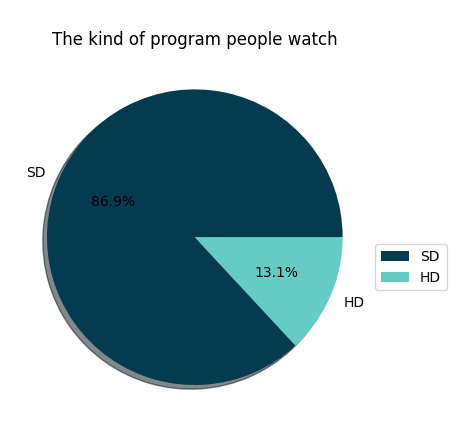

73290

In [ ]:
the_total_movies_HD=df[(df['program_class']=='MOVIE') & (df['hd']==1)]
the_total_movies_SD=df[(df['program_class']=='MOVIE')& (df['hd']==0)]


the_total_seriace_HD=df[(df['program_class']=='SERIES/EPISODES') & (df['hd']==1)]
the_total_seriace_SD=df[(df['program_class']=='SERIES/EPISODES') & (df['hd']==0)]



y = np.array([len(the_total_seriace_SD), len(the_total_seriace_HD)])
mylabels = ["SD", "HD"]
mycolors = ['#053B50', '#64CCC5']
legend_position = (1.2, 0.5)

plt.pie(y, labels=mylabels, shadow=True, colors=mycolors, autopct='%1.1f%%')

plt.legend(bbox_to_anchor=legend_position)
plt.title('\nThe kind of program people watch')
plt.show()


len(the_total_seriace_HD)

# `How many people watch movies and how many people watch series?`

Percentage of rows classified as 'SERIES_EPISODES': 53.42240659943256
Percentage of rows classified as 'MOVIE': 46.57759340056744


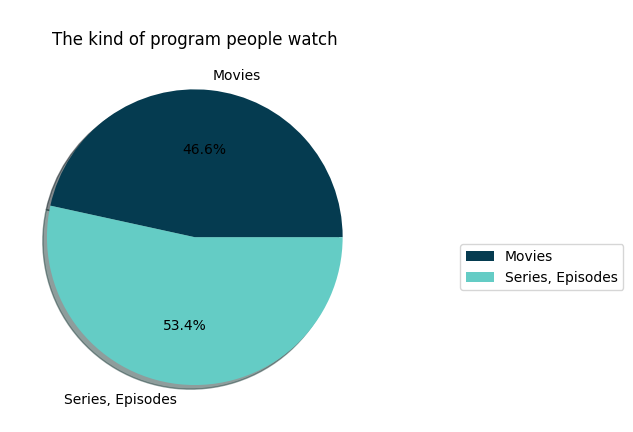

In [ ]:
# counts = df['program_class'].value_counts() #the count of each value in the class

# #storing value on variables
# SERIES_EPISODES = counts.get('SERIES/EPISODES', 0)
# MOVIE = counts.get('MOVIE', 0)

# print("Number of rows classified as 'SERIES_EPISODES':", SERIES_EPISODES)
# print("Number of rows classified as 'MOVIE':", MOVIE)
counts = df['program_class'].value_counts()  # count of each value in the 'program_class' column

# calculate percentages
total = counts.sum()
SERIES_EPISODES = counts.get('SERIES/EPISODES', 0) / total * 100
MOVIE = counts.get('MOVIE', 0) / total * 100

print("Percentage of rows classified as 'SERIES_EPISODES':", SERIES_EPISODES)
print("Percentage of rows classified as 'MOVIE':", MOVIE)

y = np.array([MOVIE, SERIES_EPISODES])
mylabels = ["Movies", "Series, Episodes"]
mycolors = ['#053B50', '#64CCC5']
legend_position = (1.2, 0.5)

plt.pie(y, labels=mylabels, shadow=True, colors=mycolors, autopct='%1.1f%%')

plt.legend(bbox_to_anchor=legend_position)
plt.title('\nThe kind of program people watch')
plt.show()



# `Top 10 movies and series that customer watch`

The Boss Baby                            24047
Pingu                                    17063
Trolls                                   13793
The Adventures of Petey and Friends       9612
Moana                                     8081
The Mermaid Princess                      7525
Baywatch                                  7436
Oscar's Oasis                             7174
Ferdinand                                 6817
An Inconvenient equel: Truth to Power     6342
Name: program_name, dtype: int64


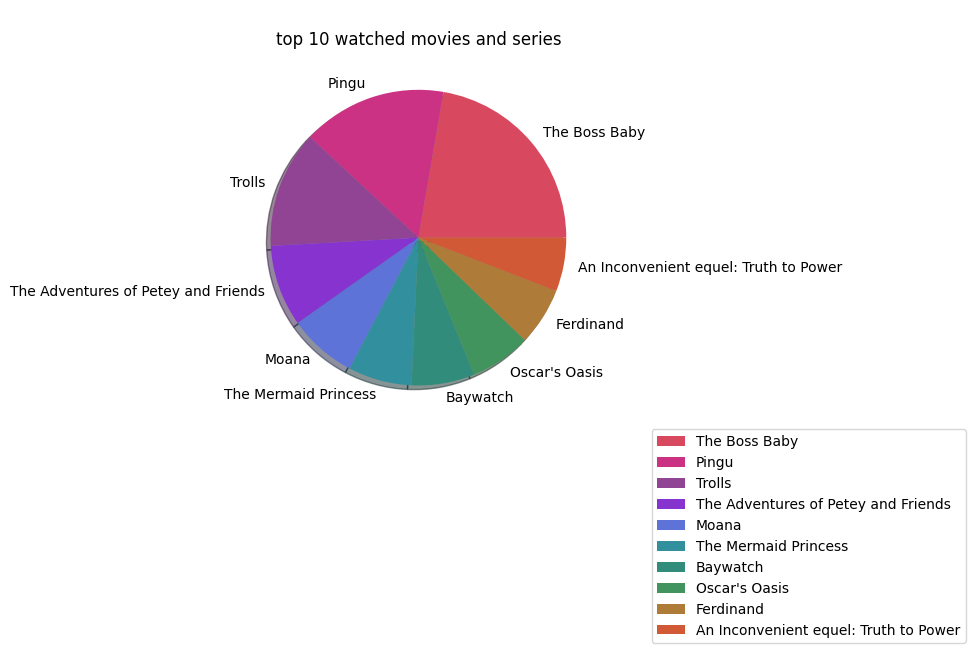

In [ ]:
top_10=(df['program_name'].value_counts()).head(10) #top 10 watched movies and series
print(top_10)

colors=['#d8495f','#cc3284','#904493','#8633d0','#5d73d7', '#32909e','#328c7b','#41945e', '#ae7b38', '#d25935']
plt.pie(top_10, labels=top_10.index, colors=colors, shadow= True)
plt.legend(bbox_to_anchor=(1,0,1,0))
plt.title('\ntop 10 watched movies and series')
plt.show()


# `The top 10 series that customers watch`

Pingu                       17063
Oscar's Oasis                7174
Nan and Lili    Ep.          5038
Me and My iblings    Ep.     4581
Taymour    Ep.               3390
In the Night Garden          3304
Sonic Underground            3264
Caramel  (T)    Chapter      3206
Teletubbies                  3072
24     :00 AM - :00 AM       2858
Name: program_name, dtype: int64


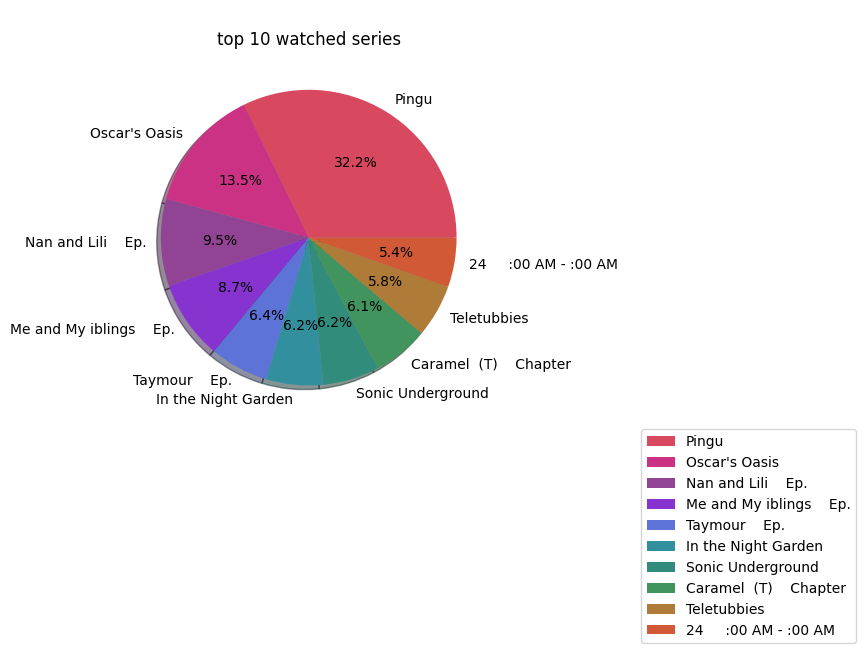

In [ ]:
df_SERIES=df[df['program_class']=='SERIES/EPISODES']#data that the program_claa = series
top_10=(df_SERIES['program_name'].value_counts()).head(10)#top 10 watched series
print(top_10)

colors=['#d8495f','#cc3284','#904493','#8633d0','#5d73d7', '#32909e','#328c7b','#41945e', '#ae7b38', '#d25935']
plt.pie(top_10, labels=top_10.index,colors=colors, autopct='%1.1f%%', shadow=True)
plt.legend(bbox_to_anchor=(1,0,1,0))
plt.title('\ntop 10 watched series')
plt.show()


# `The number of viewers for HD and SD`

0    643539
1    405036
Name: hd, dtype: int64


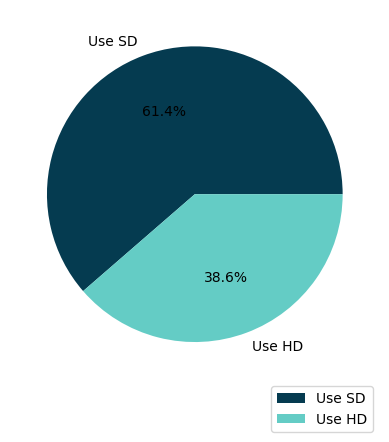

In [ ]:
hd=df['hd'].value_counts() #All the hd data count
print(hd)

# 1 is HD
# 0 use SD
labels = ['Use HD' if val == 1 else 'Use SD' for val in hd.index] #Sprate the SD from HD by the value 1 or 0

plt.pie(hd, labels=labels,colors=mycolors, autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1,0,0,0))
plt.show()
